**Fin 585R**  
**Diether**  
**Problem Set**  
**Time Series Tests of the CAPM**  

**Overview**  

In this problem set you test the CAPM using the time series framework. Specifically, you test whether the CAPM holds with respect to *momentum portfolios* (Jegadeesh and Titman, 1993, "Returns to Buying Winners and Selling Losers: Implications for Stock Market Efficiency") using the **time series testing framework.** Momentum portfolios are formed based on past returns. Specifically, momentum portfolios are most commonly formed based on the cumulative return from months $t-12$ to $t-2$:

$$
r_{i,t-12:t-2} \approx \sum_{x=2}^{12} \log(1+r_{i,t-x})
$$

I formed equal-weight momentum portfolios for you; the portfolios are available for download on *Learning Suite* or you can download it directly from the following link: [momentum portfolios](https://diether.org/prephd/10-port_mom_ew.csv)). Note, that in my data the returns for these portfolios are in percent; I have multiplied the raw returns by 100. Also, to test the CAPM you are going to need a proxy for the market portfolio and for the riskfree rate. Data from these can be found at [Ken French's Data Library](https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html). For your convenience I have created a csv file that contains both these variables, and it can be loaded directly into a dataframe from my website (see the code below). The `dataframe` contains the excess return on a proxy for the market portfolio (`exmkt`), a proxy for the riskfree rate (`rf`), and some other portfolios you can ignore. The returns from Ken French's library are also in percent: raw returns multiplied by 100.

For questions that require some write-up, create a markdown cell (use the Cell Toolbar)  and write your answer in the markdown cell (this cell is a markdown cell and here is a [markdown cheat sheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)). 

**Tasks and Questions**  

1. Compute and report the sample mean, standard deviation, and t-test for the mean = 0 for the *excess returns* of the momentum portfolios ($r_p-r_f$). <br><br>

2. Test the CAPM by running a time series CAPM regression for each of the momentum portfolios: <br><br>
$$
r_{pt} - r_{ft} = \alpha_p + \beta_{pM}( r_{Mt} - r_{ft}) + \epsilon_{it}
$$
<br>Consolidate all your regression results into one table (hint, go take a look at the jupyter notebook on estimating regressions in `pandas` and `statsmodels`). <br><br>

3. Interpret the regression results from question 2). What can you infer? Can you reject that
the CAPM holds? Is the market portfolio the tangency portfolio? <br><br>

4. Create a spread portfolio:<br><br>
$$
r_{spread,t} = r_{4t} - r_{0t}.
$$
<br>Test the CAPM using this portfolio. Can you reject the CAPM?<br><br>

5. Estimate the security market line using the data available for this homework. Specifically, estimate the following line:  <br><br>
$$
E(r_p) = r_f + \beta_{p}\bigl[E(r_M) - r_f\bigr]
$$
<br> You don't need to plot the estimated line, but report your estimates of $r_f$ and $E(r_M) - r_f$. <br><br>

6. Why is the intercept in time series CAPM regression called an *average abnormal return*? Briefly explain.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from finance_byu.regtables import Regtable
from finance_byu.summarize import summary

In [2]:
port = pd.read_csv('https://diether.org/prephd/10-port_mom_ew.csv',parse_dates=['caldt'])
port.head(5)

,caldt,p0,p1,p2,p3,p4
0,1927-01-31,-2.708397,4.290747,0.776512,1.210773,0.508464
1,1927-02-28,5.418420,8.356758,4.758203,4.905527,5.422874
2,1927-03-31,-3.829973,-2.910900,-1.801945,0.259834,0.020529
3,1927-04-30,-0.747539,-0.438827,-0.216951,-0.172500,3.216826
4,1927-05-31,3.314240,5.759958,7.950440,8.014930,8.587076


In [3]:
fac = pd.read_csv('https://diether.org/prephd/10-factors.csv',parse_dates=['caldt'])
fac.head(5)

,caldt,exmkt,smb,hml,umd,rf
0,1927-01-31,-0.06,-0.37,4.54,0.36,0.25
1,1927-02-28,4.18,0.04,2.94,-2.14,0.26
2,1927-03-31,0.13,-1.65,-2.61,3.61,0.30
3,1927-04-30,0.46,0.30,0.81,4.30,0.25
4,1927-05-31,5.44,1.53,4.73,3.00,0.30


In [4]:
df = pd.merge(fac, port, on = "caldt")
df = df.dropna(how = 'any')
df

,caldt,exmkt,smb,hml,umd,rf,p0,p1,p2,p3,p4
0,1927-01-31,-0.06,-0.37,4.54,0.36,0.25,-2.708397,4.290747,0.776512,1.210773,0.508464
1,1927-02-28,4.18,0.04,2.94,-2.14,0.26,5.418420,8.356758,4.758203,4.905527,5.422874
2,1927-03-31,0.13,-1.65,-2.61,3.61,0.30,-3.829973,-2.910900,-1.801945,0.259834,0.020529
3,1927-04-30,0.46,0.30,0.81,4.30,0.25,-0.747539,-0.438827,-0.216951,-0.172500,3.216826
4,1927-05-31,5.44,1.53,4.73,3.00,0.30,3.314240,5.759958,7.950440,8.014930,8.587076
...,...,...,...,...,...,...,...,...,...,...,...
1144,2022-05-31,-0.34,-1.85,8.41,2.48,0.03,-5.392614,-2.553349,0.502323,-0.183222,1.199527
1145,2022-06-30,-8.43,2.09,-5.97,0.79,0.06,-5.344633,-8.743887,-8.291228,-4.778448,-9.131728
1146,2022-07-29,9.57,2.81,-4.10,-3.96,0.08,11.776372,11.033183,9.284861,6.875124,8.193744
1147,2022-08-31,-3.77,1.39,0.31,2.10,0.19,0.317134,-2.100848,-2.140245,-2.222316,0.123339


<b> QUESTION 1: </b>

1. Compute and report the sample mean, standard deviation, and t-test for the mean = 0 for the *excess returns* of the momentum portfolios ($r_p-r_f$). <br>

In [5]:
df[['p0', 'p1', 'p2', 'p3', 'p4']] = df[['p0', 'p1', 'p2', 'p3', 'p4']].sub(df.rf, axis = 0)
summary(df[['p0', 'p1', 'p2', 'p3', 'p4']]).loc[['mean', 'std', 'tstat']]

,p0,p1,p2,p3,p4
mean,0.126615,0.587457,0.831937,1.007458,1.316829
std,9.130864,7.101630,6.282892,5.890136,6.653443
tstat,0.470039,2.804000,4.488395,5.797782,6.708770


<b> QUESTION 2: </b>

2. Test the CAPM by running a time series CAPM regression for each of the momentum portfolios: <br><br>
$$
r_{pt} - r_{ft} = \alpha_p + \beta_{pM}( r_{Mt} - r_{ft}) + \epsilon_{it}
$$
<br>Consolidate all your regression results into one table (hint, go take a look at the jupyter notebook on estimating regressions in `pandas` and `statsmodels`). <br><br>

In [6]:
regs = []
for i in range(5):
    reg_x = reg0 = smf.ols('p'+str(i)+' ~ exmkt',data=df).fit()
    regs.append(reg_x)
    print(reg_x.summary())
    print('#'*100, end = '\n\n\n')

                            OLS Regression Results                            
Dep. Variable:                     p0   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     3705.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        13:30:41   Log-Likelihood:                -3342.5
No. Observations:                1149   AIC:                             6689.
Df Residuals:                    1147   BIC:                             6699.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8568      0.132     -6.490      0.0

In [7]:
tbl = Regtable(regs,stat='tstat',sig='coeff')
tbl.render()

/Users/sethjpete/opt/anaconda3/lib/python3.9/site-packages/finance_byu/regtables.py:176: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out = out.append(obs)
/Users/sethjpete/opt/anaconda3/lib/python3.9/site-packages/finance_byu/regtables.py:178: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out = out.append(rsqs)


,p0,p1,p2,p3,p4
,,,,,
Intercept,-0.857***,-0.216**,0.107,0.327***,0.595***
,(-6.49),(-2.57),(1.63),(5.36),(6.33)
exmkt,1.488***,1.215***,1.096***,1.030***,1.092***
,(60.87),(78.18),(89.76),(91.05),(62.70)
Obs,1149,1149,1149,1149,1149
Rsq,0.76,0.84,0.88,0.88,0.77


<b> QUESTION 4: </b>

3. Interpret the regression results from question 2). What can you infer? Can you reject that
the CAPM holds? Is the market portfolio the tangency portfolio? <br>

<b> By analyzing the Regression Table </b>, and by analyzing the alpha of the CAPM model, which is the intercept in our model, we see we clearly reject the null hypothesis that p0, p1, p3, and p4 are zero. It doesn't matter that our t-statistic for p2 is low, as we have several counter-examples that demonstrates that alpha is significantly nonzero. Hence, we then reject the joint-hypothesis that the market is efficient and that the CAPM holds. 

<b> QUESTION 5: </b>

4. Create a spread portfolio:<br><br>
$$
r_{spread,t} = r_{4t} - r_{0t}.
$$
<br>Test the CAPM using this portfolio. Can you reject the CAPM?<br>

In [8]:
df['spread'] = df['p4'] - df['p0']
df.head(5)

,caldt,exmkt,smb,hml,umd,rf,p0,p1,p2,p3,p4,spread
0,1927-01-31,-0.06,-0.37,4.54,0.36,0.25,-2.958397,4.040747,0.526512,0.960773,0.258464,3.216862
1,1927-02-28,4.18,0.04,2.94,-2.14,0.26,5.158420,8.096758,4.498203,4.645527,5.162874,0.004454
2,1927-03-31,0.13,-1.65,-2.61,3.61,0.30,-4.129973,-3.210900,-2.101945,-0.040166,-0.279471,3.850502
3,1927-04-30,0.46,0.30,0.81,4.30,0.25,-0.997539,-0.688827,-0.466951,-0.422500,2.966826,3.964365
4,1927-05-31,5.44,1.53,4.73,3.00,0.30,3.014240,5.459958,7.650440,7.714930,8.287076,5.272836


In [9]:
print(smf.ols('spread ~ exmkt',data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                 spread   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     175.5
Date:                Thu, 09 Feb 2023   Prob (F-statistic):           2.25e-37
Time:                        13:30:41   Log-Likelihood:                -3574.5
No. Observations:                1149   AIC:                             7153.
Df Residuals:                    1147   BIC:                             7163.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4521      0.162      8.988      0.0

In the spread portfolio, the t statistic is very high, so the intercept is significantly non-zero. Hence we once again reject the joint hypothesis that the Market is Efficient and the CAPM holds.

<b> QUESTION 5: </b>

5. Estimate the security market line using the data available for this homework. Specifically, estimate the following line:  <br><br>
$$
E(r_p) = r_f + \beta_{p}\bigl[E(r_M) - r_f\bigr]
$$
<br> You don't need to plot the estimated line, but report your estimates of $r_f$ and $E(r_M) - r_f$. <br>

In [18]:
# Recover Beta for each portfolio
ports = ['p'+str(i) for i in range(0,5)]

# Get avg Excess Market Return and Avg Riskfree Rate from the data
avg_rf = df.rf.mean()
avg_ex = df.exmkt.mean()

# Totally nasty double-list comprehension
betas = [series.exmkt for series in [smf.ols(r + ' ~ 1 + exmkt',data=df).fit().params for r in ports]]
betas = sorted(betas,reverse = True)
betas

[1.4879813365221193,
 1.2152436226440098,
 1.096230922421694,
 1.0917101732541803,
 1.0295205350070717]

In [24]:
# Evaluate security market line at each point
expected_return = np.round(avg_rf + np.multiply(betas, avg_ex), 3)
print(*expected_return)

1.25 1.069 0.991 0.988 0.947


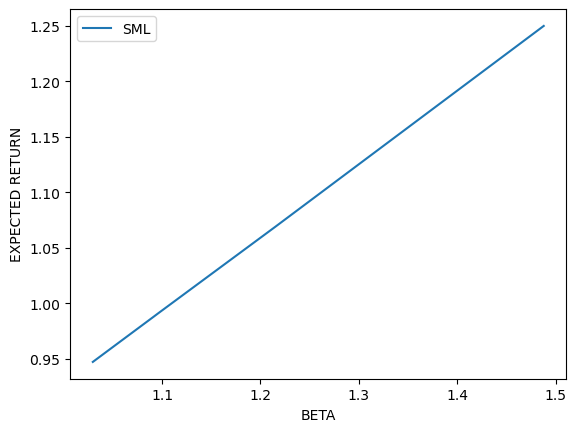

In [34]:
import matplotlib.pyplot as plt
plt.plot(betas, expected_return, label = "SML")
plt.xlabel("BETA")
plt.ylabel("EXPECTED RETURN")
plt.legend(loc='upper left')
plt.show()